In [2]:
from datetime import datetime as dt

import pandas as pd

from analsis.analsis_utils.plot_utils import plot_performance_vs_target_performance_bar_plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

blues = ["#63bff0", "#a7d5ed", "#0d88e6", ]
rads = ["#ea5545", "#e1a692", "#b30000", ]

In [38]:
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
plots_path = f'{local_base_path}/plots/retina_from_label_to_arch_to_label/ergm_sampling'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

task_name = 'retina'
num_features = 5
results_base_path = f"{base_path}/teach_archs/{task_name}"
results_path = f'{results_base_path}/{task_name}_teach_archs_requiered_features_ergm/{num_features}_features'

res_csv_name_no_duplicates = '2023-07-30-11-20-29_based_on_2023-07-22-14-40-54/2023-07-30-12-34-48_all_results_on_ergm_combined_no_duplicates.csv'
res_no_duplicates = pd.read_csv(f"{results_path}/{res_csv_name_no_duplicates}")
res_csv_name_no_duplicates2 = '2023-07-22-14-40-54/2023-07-30-12-44-24_all_results_on_ergm_combined_no_duplicates.csv'
res_no_duplicates2 = pd.read_csv(f"{results_path}/{res_csv_name_no_duplicates2}")


In [9]:
res_csv_name_no_duplicates

'2023-07-27-11-54-20_all_results_on_ergm_combined_no_duplicates.csv'

In [27]:
required_performance_max = float(res_no_duplicates['required_performance_max'].iloc[0])
required_performance_min = float(res_no_duplicates['required_performance_min'].iloc[0])
required_performance_diff = required_performance_max - required_performance_min

In [29]:
num = 10
bin_range = np.arange(
    required_performance_min - (1 * required_performance_diff),
    required_performance_max + (1 * required_performance_diff),
    required_performance_diff / num,
)

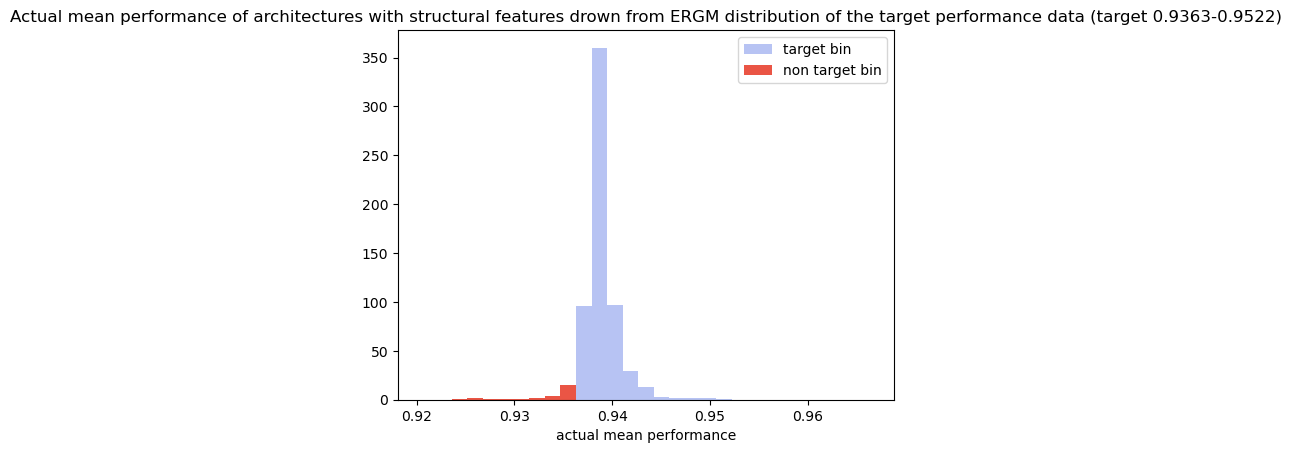

In [30]:

num_stds = None
fig = plt.figure()
ax = fig.add_subplot(111, )
n, bins, patches = ax.hist(
    x=res_no_duplicates['mean_performance'].astype(float),
    bins=bin_range,
    color='#ea5545',
    density=True
)
for i in range(num, num * 2):
    patches[i].set_facecolor('#B7C3F3')
h = [Patch(facecolor='#B7C3F3', label='Color Patch'), patches]
ax.legend(h, ['target bin', 'non target bin', ])
plt.xlabel('actual mean performance')
str_addition = ''
if num_stds:
    str_addition = f'(distance from mean < {num_stds} stds) '
plt.title(
    f'Actual mean performance of architectures with structural features drown from ERGM '
    f'distribution {str_addition}of the target performance data (target {round(required_performance_min, 4)}-'
    f'{round(required_performance_max, 4)})',
    wrap=True,
)
plt.savefig(
    f'{plots_path}/{time_str}_predicted_mean_performance_of_arch_from_ergm_'
    f'{num_features}_features.png')
plt.show()


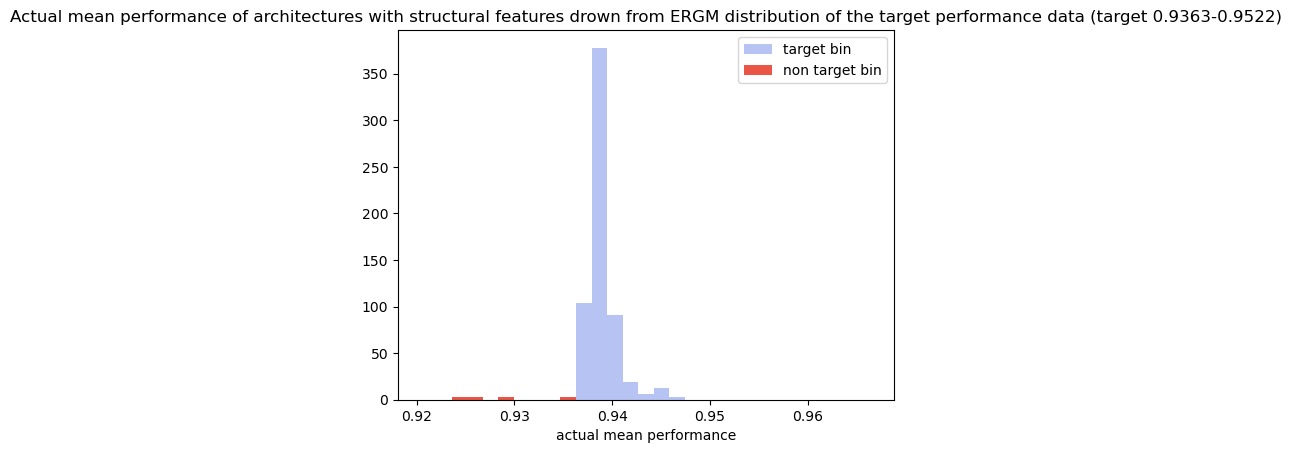

In [39]:

num_stds = None
fig = plt.figure()
ax = fig.add_subplot(111, )
n, bins, patches = ax.hist(
    x=res_no_duplicates2['mean_performance'].astype(float),
    bins=bin_range,
    color='#ea5545',
    density=True
)
for i in range(num, num * 2):
    patches[i].set_facecolor('#B7C3F3')
h = [Patch(facecolor='#B7C3F3', label='Color Patch'), patches]
ax.legend(h, ['target bin', 'non target bin', ])
plt.xlabel('actual mean performance')
str_addition = ''
if num_stds:
    str_addition = f'(distance from mean < {num_stds} stds) '
plt.title(
    f'Actual mean performance of architectures with structural features drown from ERGM '
    f'distribution {str_addition}of the target performance data (target {round(required_performance_min, 4)}-'
    f'{round(required_performance_max, 4)})',
    wrap=True,
)
plt.savefig(
    f'{plots_path}/{time_str}_predicted_mean_performance_of_arch_from_ergm_'
    f'{num_features}_features_2.png')
plt.show()


In [40]:
all_res = pd.concat([res_no_duplicates2, res_no_duplicates])

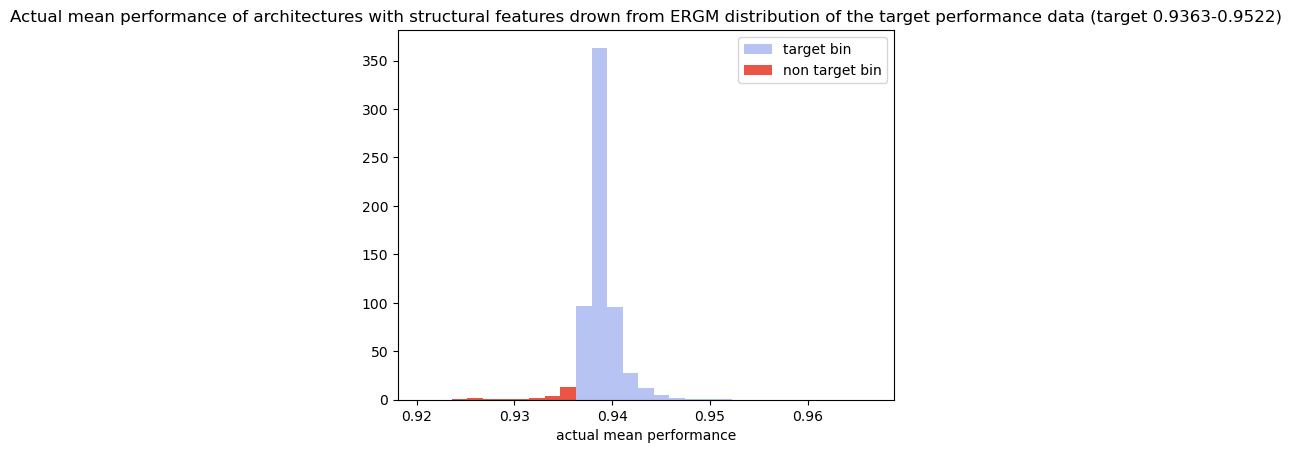

In [41]:

num_stds = None
fig = plt.figure()
ax = fig.add_subplot(111, )
n, bins, patches = ax.hist(
    x=all_res['mean_performance'].astype(float),
    bins=bin_range,
    color='#ea5545',
    density=True
)
for i in range(num, num * 2):
    patches[i].set_facecolor('#B7C3F3')
h = [Patch(facecolor='#B7C3F3', label='Color Patch'), patches]
ax.legend(h, ['target bin', 'non target bin', ])
plt.xlabel('actual mean performance')
str_addition = ''
if num_stds:
    str_addition = f'(distance from mean < {num_stds} stds) '
plt.title(
    f'Actual mean performance of architectures with structural features drown from ERGM '
    f'distribution {str_addition}of the target performance data (target {round(required_performance_min, 4)}-'
    f'{round(required_performance_max, 4)})',
    wrap=True,
)
plt.savefig(
    f'{plots_path}/{time_str}_predicted_mean_performance_of_arch_from_ergm_'
    f'{num_features}_features_all.png')
plt.show()


In [43]:
all_res.shape

(1072, 14)